In [2]:
import cv2
import numpy as np
import requests
from PIL import Image

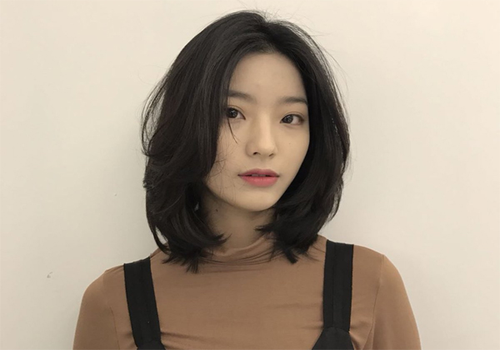

In [17]:
img = Image.open(requests.get('http://www.dreamers.id/img_artikel/27lee-saerom-fromis9.jpg', stream=True).raw).convert('RGB')
img_logow = img.resize((500, 350), Image.Resampling.LANCZOS)
img_textw = img.resize((500, 350), Image.Resampling.LANCZOS)
img_logow


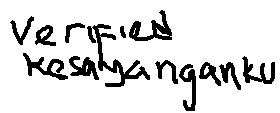

In [18]:
logo = Image.open(requests.get('https://drive.google.com/uc?export=download&id=17xDweKSq-RdSEVtvQZQzPVI1na30x8MQ', stream=True).raw).convert('RGB')
logo

In [22]:
img_logow = np.array(img_logow)
logo = np.array(logo)

h_img, w_img, _ = img_logow.shape
h_logo, w_logo, _ = logo.shape

In [25]:
center_y = int(h_img / 2)
center_x = int(w_img / 2)

top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)

bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [35]:
roi = img_logow[top_y: bottom_y, left_x: right_x]

result = cv2.addWeighted(roi, 1, logo, 1, 0)

cv2.line(img_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(img_logow, (right_x, center_y), (w_img, center_y), (0, 0, 255), 1)

result = img_logow[top_y: bottom_y, left_x: right_x]

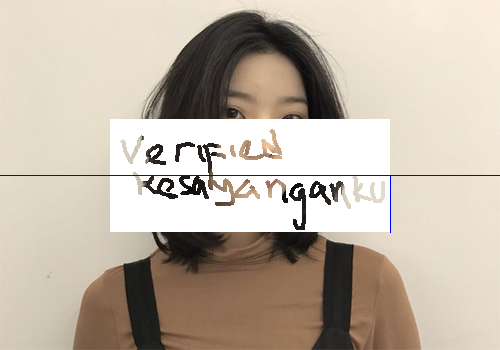

In [36]:
img = Image.fromarray(img_logow, 'RGB')
img

In [39]:
img_text = np.array(img_textw)
cv2.putText(img_text, text='Lee Saerom', org=(w_img - 95, h_img - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_4)

array([[[235, 227, 210],
        [234, 224, 208],
        [236, 224, 207],
        ...,
        [251, 238, 222],
        [250, 238, 222],
        [251, 239, 223]],

       [[235, 224, 208],
        [234, 223, 206],
        [234, 223, 205],
        ...,
        [250, 237, 221],
        [249, 237, 221],
        [250, 238, 222]],

       [[236, 225, 207],
        [235, 223, 205],
        [234, 223, 205],
        ...,
        [250, 237, 220],
        [250, 237, 221],
        [251, 238, 222]],

       ...,

       [[215, 203, 187],
        [212, 200, 184],
        [212, 200, 184],
        ...,
        [229, 216, 200],
        [228, 216, 200],
        [231, 218, 202]],

       [[214, 202, 186],
        [212, 200, 184],
        [212, 200, 184],
        ...,
        [228, 215, 199],
        [228, 216, 200],
        [230, 217, 201]],

       [[216, 204, 190],
        [214, 202, 188],
        [214, 202, 187],
        ...,
        [230, 218, 203],
        [230, 218, 204],
        [232, 220, 206]]

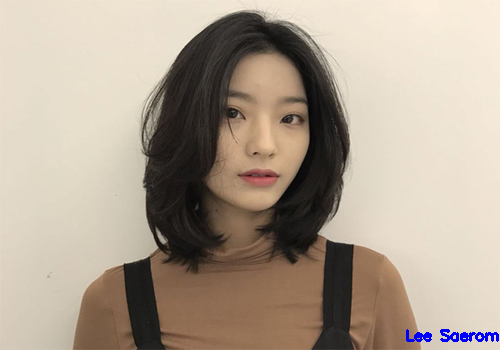

In [38]:
timg = Image.fromarray(img_text, 'RGB')
timg